<a href="https://colab.research.google.com/github/GuptaSandip/Laptop_Price_Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading and understanding data

In [ ]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# features in dataset
list_of_variables = list(df.columns)
print("Features in Dataset:",list_of_variables)

Features in Dataset: ['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']


In [ ]:
# deleting `Unnamed: 0` column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# printing dataframe after deleting `Unnamed: 0`
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# cheking null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
# checking duplicated values
df.duplicated().sum()

29

In [ ]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# cheking again
df.duplicated().sum()

0

In [ ]:
# chekcing more information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


#### At this Stage everything looks good. let's do futhure preprocessing.


In [ ]:
# creating function to see all unique values for columns
def uniquecol(col):
    print(f'Details of the {col} column : {df[col].unique()}')
for col in df.columns:
    uniquecol(col)
    print('-'*85)

Details of the Company column : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
-------------------------------------------------------------------------------------
Details of the TypeName column : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
-------------------------------------------------------------------------------------
Details of the Inches column : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
-------------------------------------------------------------------------------------
Details of the ScreenResolution column : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touc

In [ ]:
# Processing Ram and weight column
'''
As we observe in ram column we have values in `GB`, so we goona replace `GB` with white space
and then change the type column from str to int.

step1 : Replace `GB` with white space.
step2 : changing data type from str to int.
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')

In [ ]:
'''
Doing same changes in Weight col, So in weight column we have values in `kg`,we goona replace `Kg` with white space
and then change the type column from str to int.

step1 : Replace `Kg` with white space.
step2 : changing data type from str to float.
'''

df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.4+ KB


In [ ]:
# So, let's move and go through more EDA part

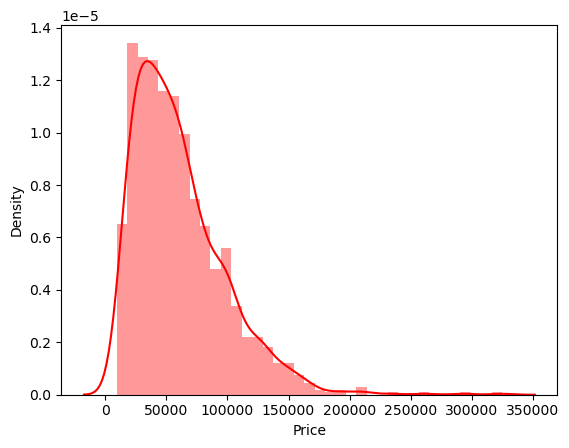

In [ ]:
# viewing a distribuation of price column
sns.distplot(df['Price'],kde=True,color='red')
plt.show()

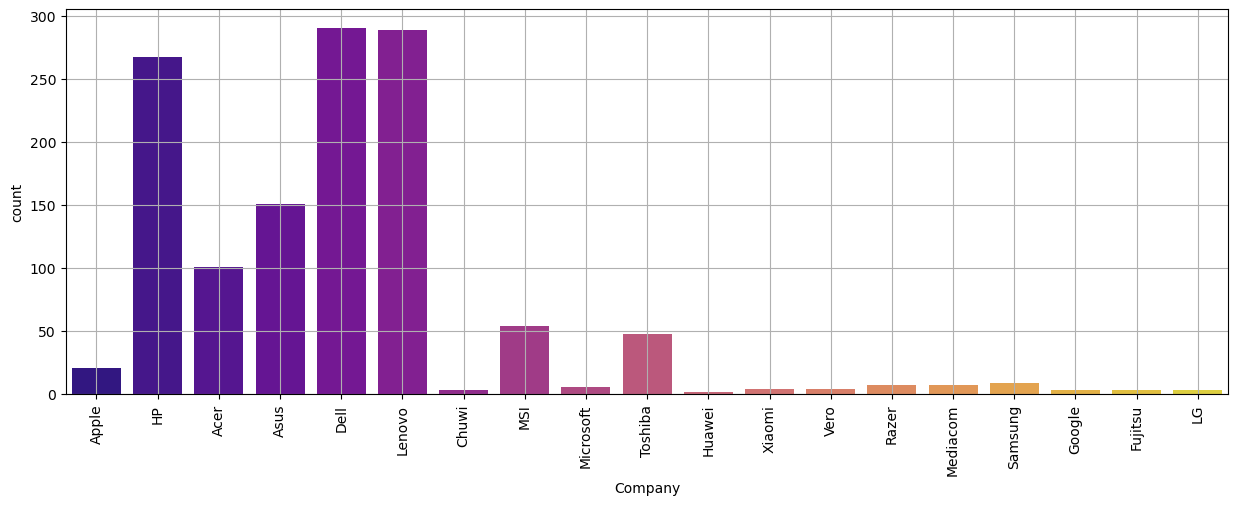

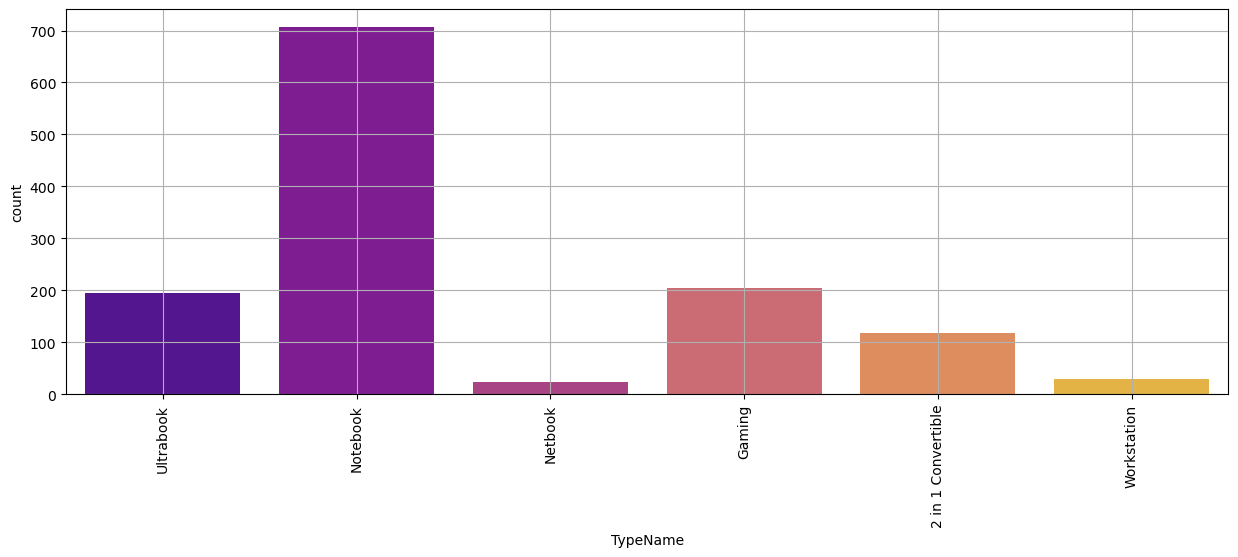

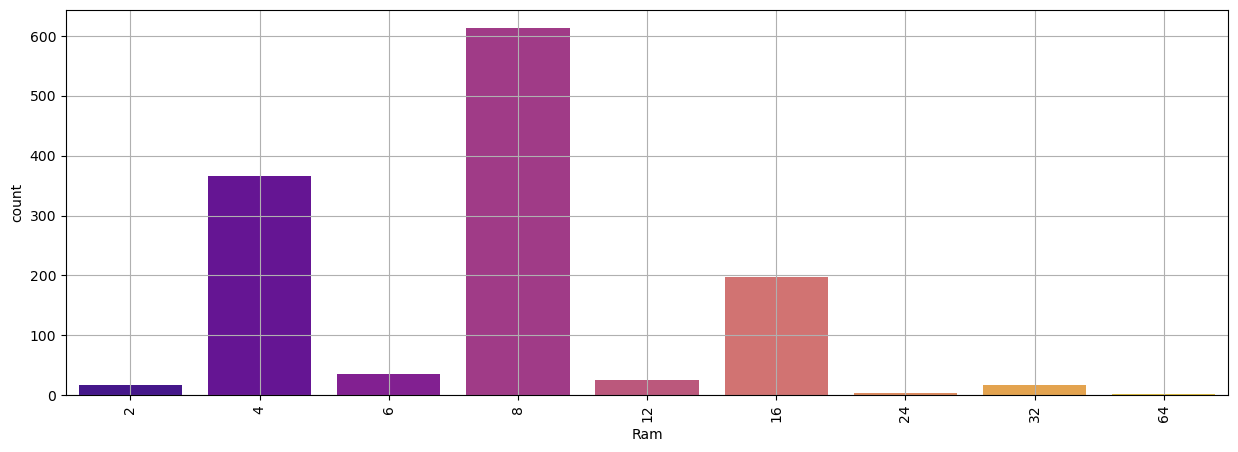

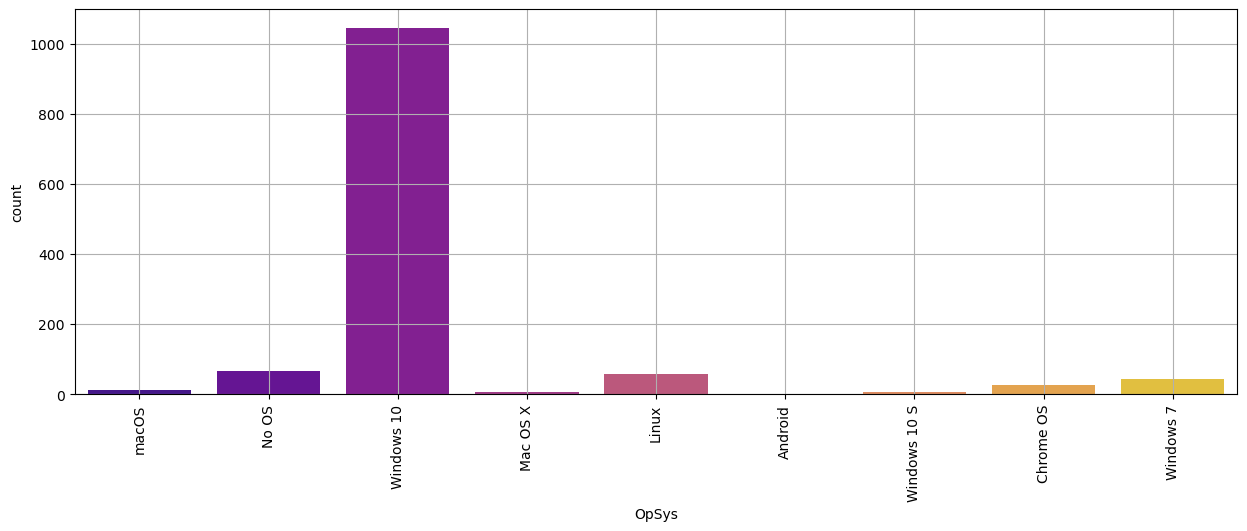

In [ ]:
# veiwing count plot for company,typename,ram and opsys
'''
It gives us idea about in market which type of company laptop people like to buy and also type,
ram and operating system.
'''

def draw_count_plot(col):
    plt.figure(figsize=[15,5])
#     df[col].value_counts().plot(kind='bar')
    sns.countplot(data=df,x=df[col])
    plt.grid(True)
    plt.xticks(rotation='vertical')

toview = ['Company','TypeName','Ram','OpSys']

for col in toview:
    draw_count_plot(col)

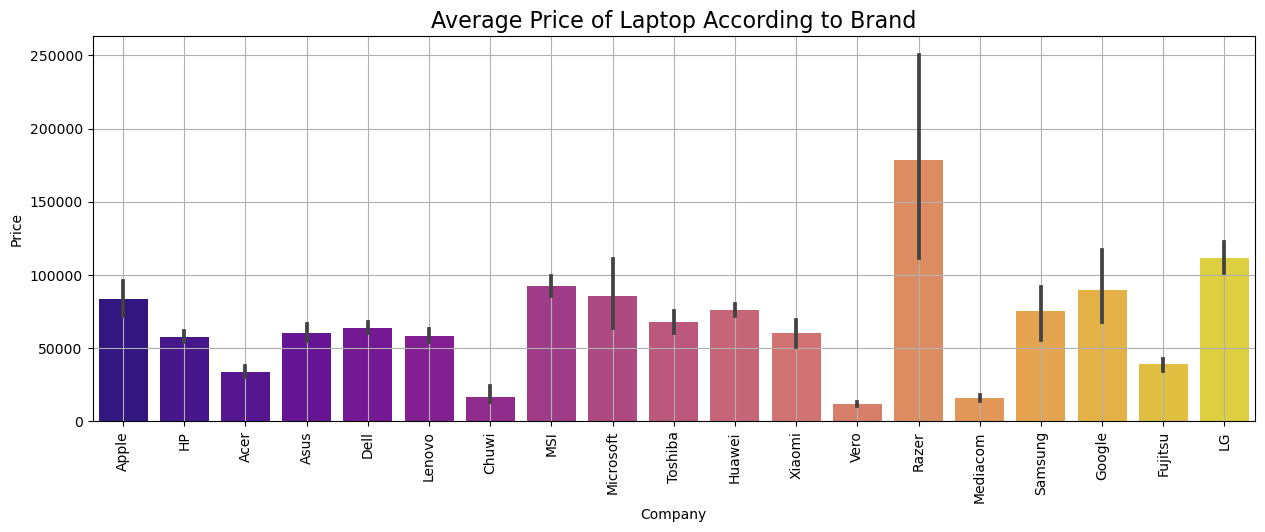

In [ ]:
# Average price for each of the laptop brands
'''
This will give us insights that as the per company the price of the laptop vary
'''

plt.figure(figsize=[15,5])
sns.barplot(data=df,x=df['Company'],y=df.Price)
plt.title("Average Price of Laptop According to Brand",fontsize='16')
plt.xticks(rotation=90)
plt.grid(True)


- Here we can clearly see that what is the average price range of a laptop and what company maximum charge for laptop.

In [ ]:
'''
Abosorve `Google` laptop it goes above 1 lakh and previously we saw that google make small numbers
of laptop but there price is more higher than others
'''
# Google laptops
df[df['Company'] == 'Google']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
437,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Chrome OS,1.1,117162.72
472,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,128GB SSD,Intel HD Graphics 615,Chrome OS,1.1,67932.00
762,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Chrome OS,1.1,83063.52


In [ ]:
# Avergae price og google laptop
avg_price=df[df['Company'] == 'Google']['Price'].mean()
print(f'Average Price of Google laptop:{avg_price}')

Average Price of Google laptop:89386.08


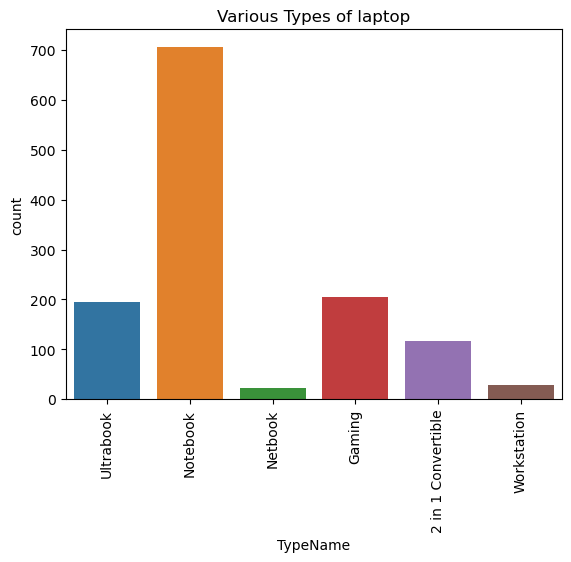

In [ ]:
## various types of laptop

sns.countplot(data=df,x=df['TypeName'])
plt.title('Various Types of laptop')
plt.xticks(rotation=90)
plt.show()

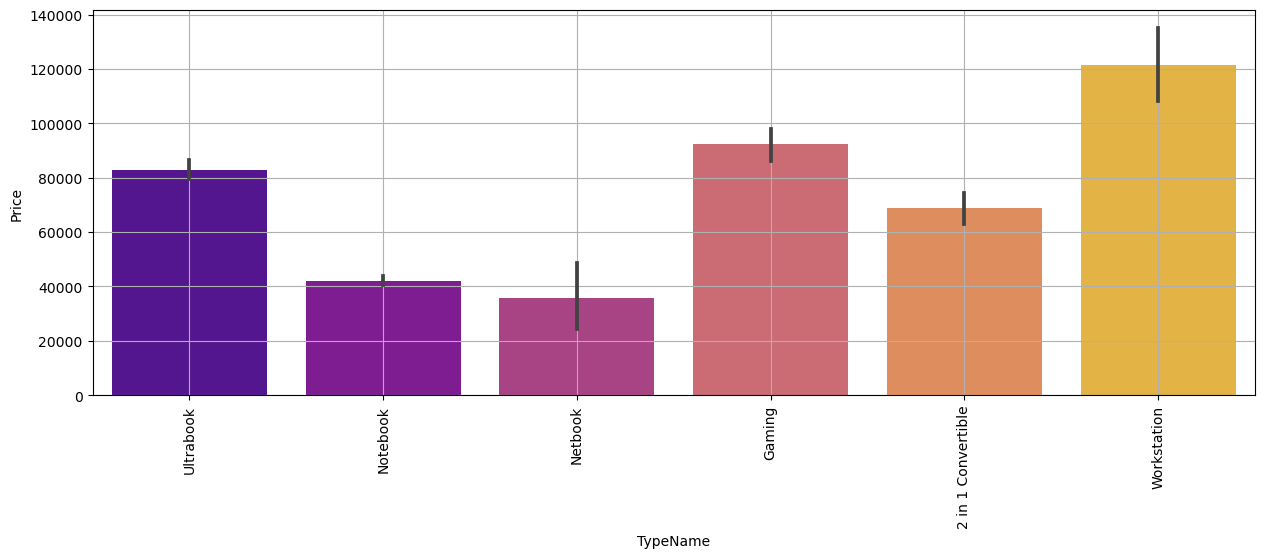

In [ ]:
# Laptop type and varition about the price
'''
This will give us insights that as the per company the price of the laptop vary
'''

plt.figure(figsize=[15,5])
sns.barplot(data=df,x=df['TypeName'],y=df.Price)
# plt.title("Average Price of Laptop According to Brand",fontsize='16')
plt.xticks(rotation=90)
plt.grid(True)

- Notebook : see notebook price variation it start from approx 22k and goes upto 45k or 46k it means people more like to buy Notebook if we see previous graph notebook are the one which people buy more. Because Everyone including students to working professional use notebook that why we see notebook price is very reginable and demands is high.

- Workstation : Workstation price is more high then notebook laptops because this type of laptop is used in companies mainly for high computational task and the price of it is also very high. Price is start from 104k and goes upto 135k. But the demand of the workstation is very low if see pervious graph.


### Note: As we see we can get more insights when we compare our independent varibale with dependent variable.

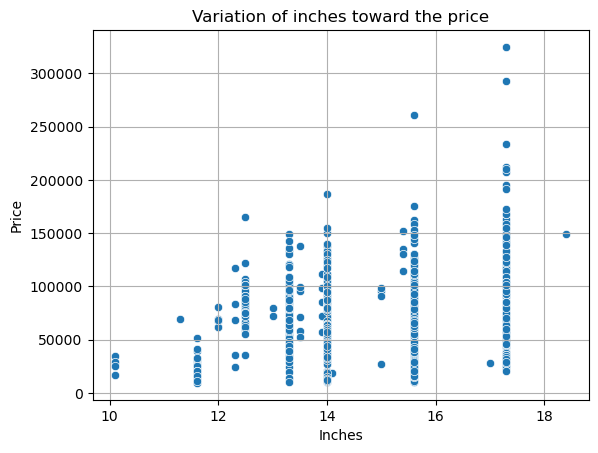

In [ ]:
# variation of inches towards the price
sns.scatterplot(data=df,x=df['Inches'],y=df.Price)
plt.title('Variation of inches toward the price')
plt.grid(True)
plt.show()

- As we see in graph scatter plot done it well. we can see that the crowd around 13 to 14 inches laptop it means people buy more laptop between 13 to 14 inches.
- But there are also 17.5 iches laptop are present in a market which price is goes more than 3 lakhs.

### Text preproceesing and Feature Engineering

#### In this dataset there are lots of columns which needs to be text processing like ScreenResolution, Memory, Cpu and Gpu.
#### Let's look into it and make better data for Machine learning Model.

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
# value counts for ScreenResolution
df.ScreenResolution.value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [ ]:
# We can see that we have 4 to 5 types of Screen resolution including `Full HD`, `IPS Panel`, 'TouchScreen'.
# so, The idea is making a seprate columns for our different different screen resolution.
'''
like creating column for TouchScreen and if we got TouchScreen laptops we gonna set value as 1 else 0.
'''

df['TouchScreen'] = df['ScreenResolution'].apply(lambda ele:1 if 'Touchscreen' in ele else 0)

In [ ]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0


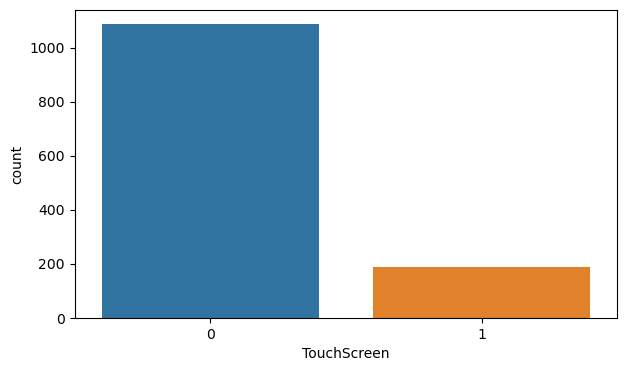

0    1086
1     188
Name: TouchScreen, dtype: int64

In [ ]:
#
plt.figure(figsize=[7,4])
sns.countplot(data=df,x=df['TouchScreen'])
plt.show()
df['TouchScreen'].value_counts()

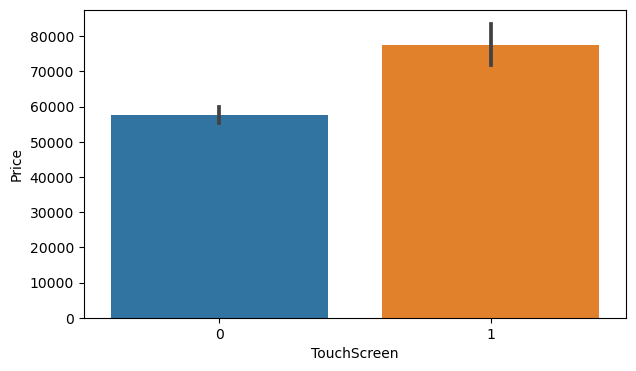

TouchScreen
0    57574.306674
1    77422.131574
Name: Price, dtype: float64

In [ ]:
# cheking variation of price for touchscreen laptop
plt.figure(figsize=[7,4])
sns.barplot(data=df,x=df.TouchScreen,y=df.Price)
plt.show()
df.groupby('TouchScreen')['Price'].mean()

- We have very less `TouchScreen` laptop compare to `non-TouchScreen` laptop. But the `TouchScrren` price is high compare to `non-touch`. It means in market `TouchScreen` laptop demands are low but price is high.

In [ ]:
## Ips pannel laptop
df['IPS'] = df['ScreenResolution'].apply(lambda ele:1 if 'IPS' in ele else 0)

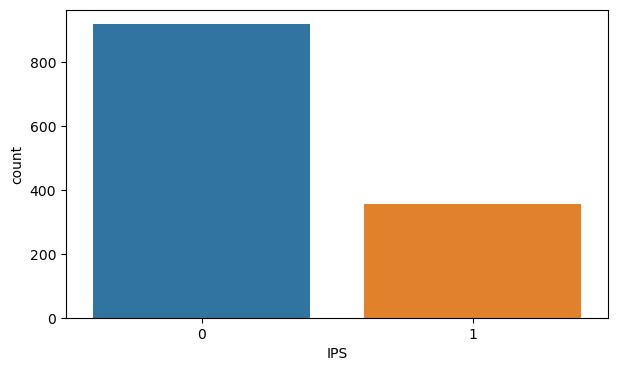

0    917
1    357
Name: IPS, dtype: int64

In [ ]:
plt.figure(figsize=[7,4])
sns.countplot(data=df,x=df['IPS'])
plt.show()
df['IPS'].value_counts()

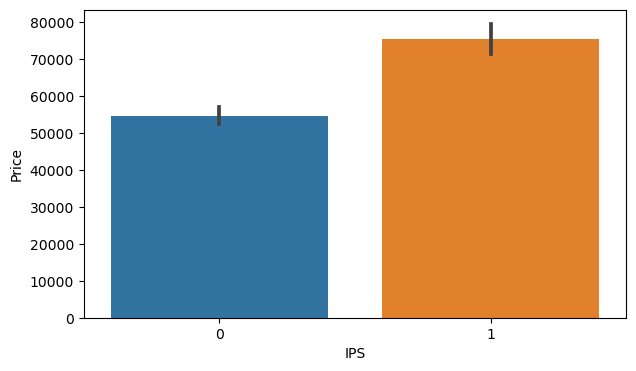

IPS
0    54673.631074
1    75477.137506
Name: Price, dtype: float64

In [ ]:
# cheking variation of price for IPS laptop
plt.figure(figsize=[7,4])
sns.barplot(data=df,x=df.IPS,y=df.Price)
plt.show()
df.groupby('IPS')['Price'].mean()